# Analyse der RunGrasshopper Evaluationsergebnisse

Dieses Notebook dient der Auswertung und Visualisierung der Routing-Ergebnisse aus der RunGrasshopper-Evaluation.

In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matrixconverters.read_ptv import ReadPTVMatrix
import geopandas as gpd
import os


In [2]:
# Load OEV and PKW matrix files directly from 'input/mtx/' in the project root (not from the notebook folder)
import os
import sys

# Always resolve from project root (one level up from 'notebooks')
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# OEV matrix: try both spellings, use first that exists
oev_candidates = [
    os.path.join(project_root, "input", "mtx", "270 RZ OEV präp.mtx")
]
mtx_oev_path = next((p for p in oev_candidates if os.path.exists(p)), None)
print("Checked OEV matrix paths:")
for p in oev_candidates:
    print("  ", p, "Exists:", os.path.exists(p))
if mtx_oev_path is None:
    raise FileNotFoundError(f"OEV matrix file not found in input/mtx/. Checked: {oev_candidates}")
else:
    print("Using OEV matrix file:", mtx_oev_path)

# PKW matrix: try both spellings, use first that exists
pkw_candidates = [
    os.path.join(project_root, "input", "mtx", "221 RZ Pkw präp.mtx")
]
mtx_pkw_path = next((p for p in pkw_candidates if os.path.exists(p)), None)
print("Checked PKW matrix paths:")
for p in pkw_candidates:
    print("  ", p, "Exists:", os.path.exists(p))
if mtx_pkw_path is None:
    raise FileNotFoundError(f"PKW matrix file not found in input/mtx/. Checked: {pkw_candidates}")
else:
    print("Using PKW matrix file:", mtx_pkw_path)

# Load OEV and PKW time matrices
zeit_oev = ReadPTVMatrix(filename=mtx_oev_path)
zeit_pkw = ReadPTVMatrix(filename=mtx_pkw_path)
matrix_zeit_oev = zeit_oev["matrix"]
matrix_zeit_pkw = zeit_pkw["matrix"]
df_travel_time_pt = matrix_zeit_oev.to_dataframe(name="Wert").reset_index()
df_traveltime_car = matrix_zeit_pkw.to_dataframe(name="Wert").reset_index()
df_travel_time_pt.set_index(["origins", "destinations"], inplace=True)
df_traveltime_car.set_index(["origins", "destinations"], inplace=True)

# Load scenario-specific lineRoute shapefile from input/shapes/pt-data (relative to project root)
scenario = "V10_2025"
# Try both lower and upper case extensions and both naming patterns
shapefile_candidates = [
    os.path.join(project_root, "input", "shapes", "pt-data", f"{scenario}_lineRoute.SHP"),
    os.path.join(project_root, "input", "shapes", "pt-data", f"{scenario}_lineRoute.shp"),
    os.path.join(project_root, "input", "shapes", "pt-data", f"scenario_{scenario}_lineRoute.shp"),
    os.path.join(project_root, "input", "shapes", "pt-data", f"scenario_{scenario}_lineRoute.SHP")
]
line_route_path = next((p for p in shapefile_candidates if os.path.exists(p)), None)
print("Checked lineRoute shapefile paths:")
for p in shapefile_candidates:
    print("  ", p, "Exists:", os.path.exists(p))
if line_route_path is None:
    raise FileNotFoundError(f"lineRoute shapefile not found. Checked: {shapefile_candidates}")
else:
    print("Using lineRoute shapefile:", line_route_path)
gdf_line_routes = gpd.read_file(line_route_path)

Checked OEV matrix paths:
   c:\Users\bienzeisler\Documents\GitHub\RVB-VISUM-analysis\input\mtx\270 RZ OEV präp.mtx Exists: True
Using OEV matrix file: c:\Users\bienzeisler\Documents\GitHub\RVB-VISUM-analysis\input\mtx\270 RZ OEV präp.mtx
Checked PKW matrix paths:
   c:\Users\bienzeisler\Documents\GitHub\RVB-VISUM-analysis\input\mtx\221 RZ Pkw präp.mtx Exists: True
Using PKW matrix file: c:\Users\bienzeisler\Documents\GitHub\RVB-VISUM-analysis\input\mtx\221 RZ Pkw präp.mtx
Checked lineRoute shapefile paths:
   c:\Users\bienzeisler\Documents\GitHub\RVB-VISUM-analysis\input\shapes\pt-data\V10_2025_lineRoute.SHP Exists: True
   c:\Users\bienzeisler\Documents\GitHub\RVB-VISUM-analysis\input\shapes\pt-data\V10_2025_lineRoute.shp Exists: True
   c:\Users\bienzeisler\Documents\GitHub\RVB-VISUM-analysis\input\shapes\pt-data\scenario_V10_2025_lineRoute.shp Exists: False
   c:\Users\bienzeisler\Documents\GitHub\RVB-VISUM-analysis\input\shapes\pt-data\scenario_V10_2025_lineRoute.SHP Exists: False

In [3]:
print("Number of unique ReBus lines:", len(gdf_line_routes[gdf_line_routes["TSYSCODE"] == "ReBus"]["LINENAME"].unique()))

Number of unique ReBus lines: 35


In [4]:
# Load schedule parquet relative to project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
schedule_path = os.path.join(project_root, "output", "scenario_V10_2025", "df_routing_OD_schedule_20250513_06-22_15m_wgs84.parquet")
print("Loading schedule from:", schedule_path)
df_schedule = pd.read_parquet(schedule_path)

Loading schedule from: c:\Users\bienzeisler\Documents\GitHub\RVB-VISUM-analysis\output\scenario_V10_2025\df_routing_OD_schedule_20250513_06-22_15m_wgs84.parquet


In [5]:
import os
import pandas as pd


# import os
# import pandas as pd
# import ast
# import numpy as np

# # Data Path
# results_path = os.path.join('..', 'output', 'scenario_V10_2025', 'df_routing_OD.csv')

# # Define dtype mapping for all columns
# dtype_map = {
#     'od_index': 'int64',
#     'transfers': 'float64',
#     'gh_time': 'float64',
#     'pure_pt_travel_time': 'float64',
#     'total_walking_distance': 'float64',
#     'walking_dist_to_first_pt_station': 'float64',
#     'first_station_name': 'object',
#     'first_station_coord': 'object',
#     'last_station_name': 'object',
#     'last_station_coord': 'object',
#     'transfer_stations': 'object',
#     'transfer_coords': 'object',
#     'transfer_wait_times': 'object',
#     'total_transfer_wait_time': 'float64',
#     'trip_headsign_0': 'object',
#     'trip_headsign_1': 'object',
#     'trip_headsign_2': 'object',
#     'route_id_0': 'object',
#     'route_id_1': 'object',
#     'route_id_2': 'object',
#     'first_leg_departure_time': 'object',
#     'final_arrival_time': 'object',
#     'has_pt': 'bool',
#     'n_pt_legs': 'int64',
#     'options_count': 'int64',
#     'departure_times_list': 'object',
#     'total_times_list': 'object',
#     'routes_sequences': 'object',
#     'best_route_sequence': 'object',
#     'number_of_transfers': 'int64',
#     'straight_line_distance_m': 'float64',
#     'slice_row_index': 'int64',
#     'pair_id': 'object',
#     'origin_endpoint_index': 'int64',
#     'destination_endpoint_index': 'int64',
#     'origin_lon_wgs84': 'float64',
#     'origin_lat_wgs84': 'float64',
#     'dest_lon_wgs84': 'float64',
#     'dest_lat_wgs84': 'float64'
# }

# # Fast load: only parse datetimes for relevant columns
# df_results_raw = pd.read_csv(
#     results_path,
#     dtype=dtype_map,
#     true_values=['True'], false_values=['False'],
#     parse_dates=['departure_time', 'first_leg_departure_time', 'final_arrival_time']
#  )

# print(f"Loaded DataFrame with {len(df_results_raw):,} rows and {len(df_results_raw.columns)} columns.")

# # Only parse list-like columns if needed (fast, on demand)
# def safe_literal_eval(val):
#     try:
#         if pd.isna(val) or val in ('', 'nan', 'None'):
#             return np.nan
#         return ast.literal_eval(val)
#     except Exception:
#         return np.nan

# list_cols = [
#     'departure_times_list', 'total_times_list', 'routes_sequences', 'best_route_sequence',
#     'transfer_stations', 'transfer_coords', 'transfer_wait_times'
#  ]
# for col in list_cols:
#     if col in df_results_raw.columns:
#         df_results_raw[col] = df_results_raw[col].apply(safe_literal_eval)

# df_results_raw.to_parquet('df_results_raw.parquet', index=False)

In [6]:
df_results_raw = pd.read_parquet('df_results_raw.parquet')
df_results_raw = df_results_raw.rename(columns={'departure_time': 'time_slice'})
print(f"Loaded DataFrame with {len(df_results_raw):,} rows and {len(df_results_raw.columns)} columns.")

Loaded DataFrame with 4,324,580 rows and 40 columns.


In [7]:
# Enrich df_results_raw with info from df_schedule via pair_id
merge_cols = [
    "pair_id",
    "origins",
    "origin_name",
    "destinations",
    "destination_name",
    "usage_rebus",
    "pt_transfers",
    "pt_trips"
    ]
# Only keep unique pair_id rows in schedule for merge
df_schedule_unique = df_schedule[merge_cols].drop_duplicates(subset=["pair_id"])
df_results_raw = df_results_raw.merge(df_schedule_unique, on="pair_id", how="left")
print(f"Enriched DataFrame shape: {df_results_raw.shape}")


Enriched DataFrame shape: (4324580, 47)


In [8]:
# Add PT and car travel times from OEV and PKW matrices to df_results_raw (English column names)
df_zeit_oev_reset = df_travel_time_pt.reset_index()
df_zeit_pkw_reset = df_traveltime_car.reset_index()

df_zeit_oev_renamed = df_zeit_oev_reset.rename(columns={"origins": "origin_id", "destinations": "destination_id", "Wert": "travel_time_pt"})
df_zeit_pkw_renamed = df_zeit_pkw_reset.rename(columns={"origins": "origin_id", "destinations": "destination_id", "Wert": "travel_time_car"})

# Ensure merge keys are int64 for both DataFrames
df_results_raw["origins"] = df_results_raw["origins"].astype("int64")
df_results_raw["destinations"] = df_results_raw["destinations"].astype("int64")

# Merge OEV travel times
df_results_raw = df_results_raw.merge(
    df_zeit_oev_renamed[["origin_id", "destination_id", "travel_time_pt"]],
    left_on=["origins", "destinations"],
    right_on=["origin_id", "destination_id"],
    how="left"
    )

# Merge PKW travel times
df_results_raw = df_results_raw.merge(
    df_zeit_pkw_renamed[["origin_id", "destination_id", "travel_time_car"]],
    left_on=["origins", "destinations"],
    right_on=["origin_id", "destination_id"],
    how="left"
    )

# Remove all origin_id_x/y and destination_id_x/y columns if present
for col in ["origin_id_x", "origin_id_y", "destination_id_x", "destination_id_y", "origin_id", "destination_id"]:
    if col in df_results_raw.columns:
        df_results_raw = df_results_raw.drop(columns=col)

# Show a sample with new columns
df_results_raw

,od_index,transfers,gh_time,pure_pt_travel_time,total_walking_distance,walking_dist_to_first_pt_station,first_station_name,first_station_coord,last_station_name,last_station_coord,...,time_slice,origins,origin_name,destinations,destination_name,usage_rebus,pt_transfers,pt_trips,travel_time_pt,travel_time_car
0,0,0.0,306.794,0.0,426.103468,426.103468,None,None,None,None,...,2025-05-13 06:00:00+00:00,310101901,BS Stadtkern 6,310101902,BS Stadtkern 9,0.199772,0.002856,22.912864,9.881249,5.574436
1,1,0.0,399.343,0.0,554.640319,554.640319,None,None,None,None,...,2025-05-13 06:00:00+00:00,310101901,BS Stadtkern 6,310101902,BS Stadtkern 9,0.199772,0.002856,22.912864,9.881249,5.574436
2,2,0.0,429.802,0.0,596.949621,596.949621,None,None,None,None,...,2025-05-13 06:00:00+00:00,310101901,BS Stadtkern 6,310101902,BS Stadtkern 9,0.199772,0.002856,22.912864,9.881249,5.574436
3,3,0.0,254.655,0.0,353.689851,353.689851,None,None,None,None,...,2025-05-13 06:00:00+00:00,310101901,BS Stadtkern 6,310101902,BS Stadtkern 9,0.199772,0.002856,22.912864,9.881249,5.574436
4,4,0.0,16.500,0.0,22.917282,22.917282,None,None,None,None,...,2025-05-13 06:00:00+00:00,310101901,BS Stadtkern 6,310101902,BS Stadtkern 9,0.199772,0.002856,22.912864,9.881249,5.574436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324575,66527,0.0,941.642,0.0,1307.832035,1307.832035,None,None,None,None,...,2025-05-13 22:00:00+00:00,315803730,WB Weisse Schanze 30,315803728,WB Weisse Schanze 28,0.092864,0.252392,18.614890,28.450387,7.302095
4324576,66528,0.0,1043.891,0.0,1449.848946,1449.848946,None,None,None,None,...,2025-05-13 22:00:00+00:00,315803730,WB Weisse Schanze 30,315803728,WB Weisse Schanze 28,0.092864,0.252392,18.614890,28.450387,7.302095
4324577,66529,0.0,1471.518,0.0,2043.774593,2043.774593,None,None,None,None,...,2025-05-13 22:00:00+00:00,315803730,WB Weisse Schanze 30,315803728,WB Weisse Schanze 28,0.092864,0.252392,18.614890,28.450387,7.302095
4324578,66530,0.0,1169.051,0.0,1623.680627,1623.680627,None,None,None,None,...,2025-05-13 22:00:00+00:00,315803730,WB Weisse Schanze 30,315803728,WB Weisse Schanze 28,0.092864,0.252392,18.614890,28.450387,7.302095


In [9]:
# Filter df_results_raw to only rows where 'gh_time' and 'travel_time_car' are not null and both > 0
mask = (
    df_results_raw["gh_time"].notnull() &
    df_results_raw["travel_time_car"].notnull() &
    (df_results_raw["gh_time"] > 0) &
    (df_results_raw["travel_time_car"] > 0)
)
df_results_raw = df_results_raw[mask].copy()
print(f"Filtered DataFrame to {len(df_results_raw):,} rows where 'gh_time' and 'travel_time_car' are not null and > 0.")


Filtered DataFrame to 4,324,573 rows where 'gh_time' and 'travel_time_car' are not null and > 0.


In [10]:
df_results_raw["travel_time_ratio"] = (df_results_raw["gh_time"] / 60) / df_results_raw["travel_time_car"]

In [11]:
import numpy as np
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype
window_minutes = 30

# If time_slice is a datetime object, convert to minutes since midnight
if is_datetime64_any_dtype(df_results_raw['time_slice']):
    df_results_raw['time_slice_minutes'] = df_results_raw['time_slice'].dt.hour * 60 + df_results_raw['time_slice'].dt.minute
    time_col = 'time_slice_minutes'
else:
    time_col = 'time_slice'

def flag_faster_alternative(group):
    # Sort by time_slice for efficient windowing
    group = group.sort_values(time_col).reset_index(drop=True)
    # Precompute for speed
    dep_times = group[time_col].values
    total_times = group['gh_time'].values
    # Initialize flag array
    has_faster = np.zeros(len(group), dtype=bool)
    for i, (dep, ttime) in enumerate(zip(dep_times, total_times)):
        # Mask for +/- 30 minute window (excluding self)
        mask = (np.abs(dep_times - dep) <= window_minutes) & (total_times < ttime)
        if mask.any():
            has_faster[i] = True
    group['has_faster_alternative_in_window'] = has_faster
    return group

# Apply groupby/apply solution
df_results_raw = df_results_raw.groupby('pair_id', group_keys=False).apply(flag_faster_alternative)

# Show result
df_results_raw[['pair_id',time_col,'gh_time','has_faster_alternative_in_window']].head(100)

C:\Users\bienzeisler\AppData\Local\Temp\ipykernel_2100\77760574.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_results_raw = df_results_raw.groupby('pair_id', group_keys=False).apply(flag_faster_alternative)


,pair_id,time_slice_minutes,gh_time,has_faster_alternative_in_window
0,ROW_0_O1_D1,360,306.794,False
1,ROW_0_O1_D1,375,306.794,False
2,ROW_0_O1_D1,390,306.794,False
3,ROW_0_O1_D1,405,306.794,False
4,ROW_0_O1_D1,420,306.794,False
...,...,...,...,...
30,ROW_0_O1_D2,810,399.343,False
31,ROW_0_O1_D2,825,399.343,False
32,ROW_0_O1_D2,840,399.343,False
33,ROW_0_O1_D2,855,399.343,False


<Axes: title={'center': 'Share of Rows with Faster Alternative in +/- 30 min Window'}, ylabel='has_faster_alternative_in_window'>

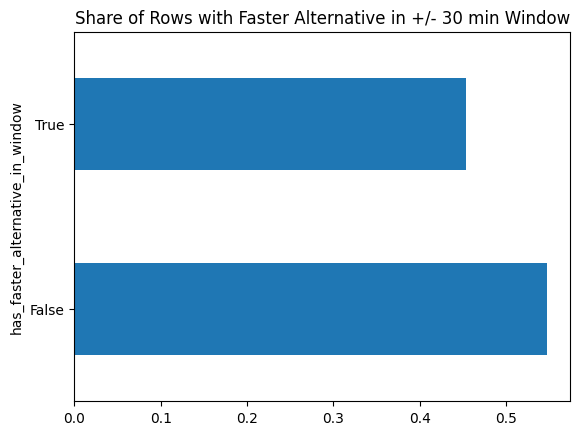

In [12]:
# Show share of rows with/without faster alternative
df_results_raw["has_faster_alternative_in_window"].value_counts(normalize=True).plot(kind='barh', title='Share of Rows with Faster Alternative in +/- 30 min Window')

In [13]:
# Filter for rows without a faster alternative in the +/- 30 min window
df_results_filtered = df_results_raw[df_results_raw["has_faster_alternative_in_window"] == False].copy()
print(f"Filtered DataFrame: {len(df_results_filtered):,} rows remain.")

Filtered DataFrame: 2,364,414 rows remain.


In [14]:
# Filter for PT results only
df_pt_filtered = df_results_filtered[df_results_filtered["has_pt"] == True].copy()
print(f"PT-only filtered DataFrame: {len(df_pt_filtered):,} rows remain.")

PT-only filtered DataFrame: 1,635,877 rows remain.


In [15]:
# Calculate walking distance from last PT station to destination
df_pt_filtered["walking_dist_from_last_pt_station"] = df_pt_filtered["total_walking_distance"] - df_pt_filtered["walking_dist_to_first_pt_station"]
df_pt_filtered[["total_walking_distance", "walking_dist_to_first_pt_station", "walking_dist_from_last_pt_station"]].head(10)
print(f"Average walking distance to first PT station: {df_pt_filtered['walking_dist_to_first_pt_station'].mean():.2f} meters.")
print(f"Average walking distance from last PT station to destination: {df_pt_filtered['walking_dist_from_last_pt_station'].mean():.2f} meters.")
print(f"Median walking distance to first PT station: {df_pt_filtered['walking_dist_to_first_pt_station'].median():.2f} meters.")
print(f"Median walking distance from last PT station to destination: {df_pt_filtered['walking_dist_from_last_pt_station'].median():.2f} meters.")

Average walking distance to first PT station: 449.38 meters.
Average walking distance from last PT station to destination: 429.11 meters.
Median walking distance to first PT station: 343.48 meters.
Median walking distance from last PT station to destination: 328.38 meters.


In [16]:
# Filter out trips with >1km access or egress walking distance
mask = (df_pt_filtered["walking_dist_to_first_pt_station"] <= 1000) & (df_pt_filtered["walking_dist_from_last_pt_station"] <= 1000)
df_pt_filtered = df_pt_filtered[mask].copy()
print(f"Trips remaining after filtering for <=1km access/egress: {len(df_pt_filtered):,} ({len(df_pt_filtered)/len(df_pt_filtered)*100:.1f}%)")
df_pt_filtered[["total_walking_distance", "walking_dist_to_first_pt_station", "walking_dist_from_last_pt_station"]].describe()
print(f"Average walking distance to first PT station: {df_pt_filtered['walking_dist_to_first_pt_station'].mean():.2f} meters.")
print(f"Average walking distance from last PT station to destination: {df_pt_filtered['walking_dist_from_last_pt_station'].mean():.2f} meters.")
print(f"Median walking distance to first PT station: {df_pt_filtered['walking_dist_to_first_pt_station'].median():.2f} meters.")
print(f"Median walking distance from last PT station to destination: {df_pt_filtered['walking_dist_from_last_pt_station'].median():.2f} meters.")

Trips remaining after filtering for <=1km access/egress: 1,471,173 (100.0%)
Average walking distance to first PT station: 381.05 meters.
Average walking distance from last PT station to destination: 363.49 meters.
Median walking distance to first PT station: 322.04 meters.
Median walking distance from last PT station to destination: 313.93 meters.


In [17]:
# Map ROUTE_ID to TSYSCODE (mode)
print("🔎 Mapping LINENAME → Mode (TSYSCODE)...")
route_to_mode = (
    gdf_line_routes.dropna(subset=["LINENAME", "TSYSCODE"])
    .drop_duplicates(subset=["LINENAME"])
    .set_index("LINENAME")["TSYSCODE"]
    .to_dict()
    )
print(f"✅ Mappings loaded: {len(route_to_mode):,} routes")

# Assign mode columns for route_id_0, route_id_1, route_id_2
print("🔁 Assigning mode columns for route_id_0, route_id_1, route_id_2...")
for i in range(3):
    route_col = f"route_id_{i}"
    mode_col = f"mode_{i}"
    df_pt_filtered[mode_col] = df_pt_filtered[route_col].map(route_to_mode)

# Classify used routes (direct / transfer)
print("🔁 Classifying used routes (direct / transfer)...")
def classify_routes(row):
    ids = [row.get(f"route_id_{i}") for i in range(3)]
    if pd.notna(ids[1]) or pd.notna(ids[2]):
        transfer = [x for x in ids if pd.notna(x)][1:]
        return {"Direct": [], "Transfer": transfer}
    else:
        return {"Direct": [ids[0]] if pd.notna(ids[0]) else [], "Transfer": []}
df_pt_filtered["used_routes"] = df_pt_filtered.apply(classify_routes, axis=1)

# Attach mode info to used_routes
print("🔁 Attaching mode info to used_routes...")
def attach_mode(used_routes_dict):
    result = {"Direct": [], "Transfer": []}
    for category in ["Direct", "Transfer"]:
        for route in used_routes_dict.get(category, []):
            mode = route_to_mode.get(route, "unknown")
            result[category].append((route, mode))
    return result
df_pt_filtered["used_routes_with_mode"] = df_pt_filtered["used_routes"].apply(attach_mode)

# Show a sample
df_pt_filtered[["route_id_0", "mode_0", "route_id_1", "mode_1", "route_id_2", "mode_2", "used_routes_with_mode"]].head(10)

🔎 Mapping LINENAME → Mode (TSYSCODE)...
✅ Mappings loaded: 1,048 routes
🔁 Assigning mode columns for route_id_0, route_id_1, route_id_2...
🔁 Classifying used routes (direct / transfer)...
🔁 Classifying used routes (direct / transfer)...
🔁 Attaching mode info to used_routes...
🔁 Attaching mode info to used_routes...


,route_id_0,mode_0,route_id_1,mode_1,route_id_2,mode_2,used_routes_with_mode
0,51_612,RBUS,None,NaN,None,NaN,"{'Direct': [('51_612', 'RBUS')], 'Transfer': []}"
3,51_612,RBUS,None,NaN,None,NaN,"{'Direct': [('51_612', 'RBUS')], 'Transfer': []}"
7,51_612,RBUS,None,NaN,None,NaN,"{'Direct': [('51_612', 'RBUS')], 'Transfer': []}"
11,51_612,RBUS,None,NaN,None,NaN,"{'Direct': [('51_612', 'RBUS')], 'Transfer': []}"
15,51_612,RBUS,None,NaN,None,NaN,"{'Direct': [('51_612', 'RBUS')], 'Transfer': []}"
19,51_612,RBUS,None,NaN,None,NaN,"{'Direct': [('51_612', 'RBUS')], 'Transfer': []}"
23,51_612,RBUS,None,NaN,None,NaN,"{'Direct': [('51_612', 'RBUS')], 'Transfer': []}"
27,51_612,RBUS,None,NaN,None,NaN,"{'Direct': [('51_612', 'RBUS')], 'Transfer': []}"
31,51_612,RBUS,None,NaN,None,NaN,"{'Direct': [('51_612', 'RBUS')], 'Transfer': []}"
35,51_612,RBUS,None,NaN,None,NaN,"{'Direct': [('51_612', 'RBUS')], 'Transfer': []}"


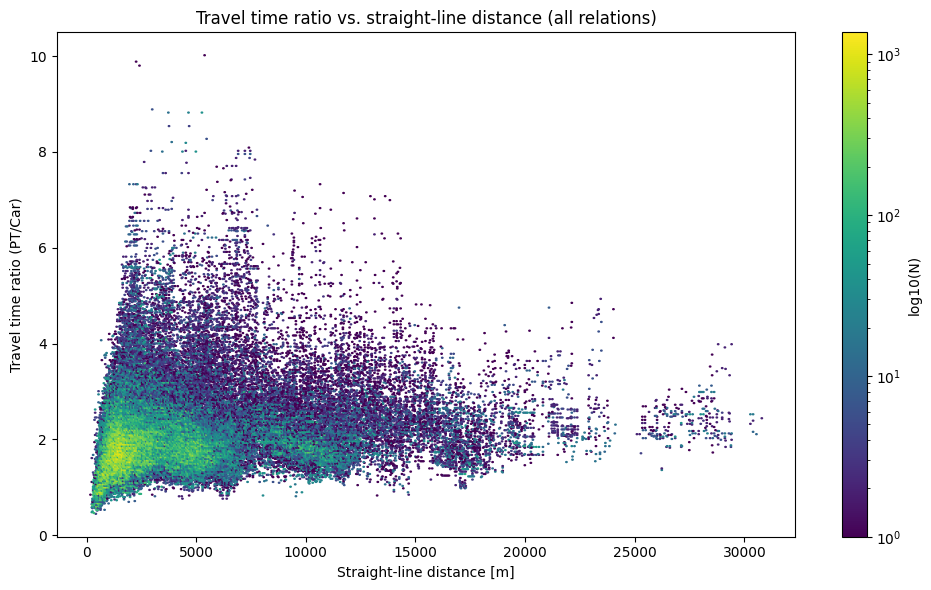

In [18]:
# Visualize travel_time_ratio vs. straight_line_distance_m for all relations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Use hexbin for large scatter (density visualization)
hb = plt.hexbin(
    df_pt_filtered["straight_line_distance_m"],
    df_pt_filtered["travel_time_ratio"],
    gridsize=500, cmap="viridis", mincnt=1, bins="log"
)
plt.colorbar(hb, label="log10(N)")
plt.xlabel("Straight-line distance [m]")
plt.ylabel("Travel time ratio (PT/Car)")
plt.title("Travel time ratio vs. straight-line distance (all relations)")
plt.tight_layout()
plt.show()


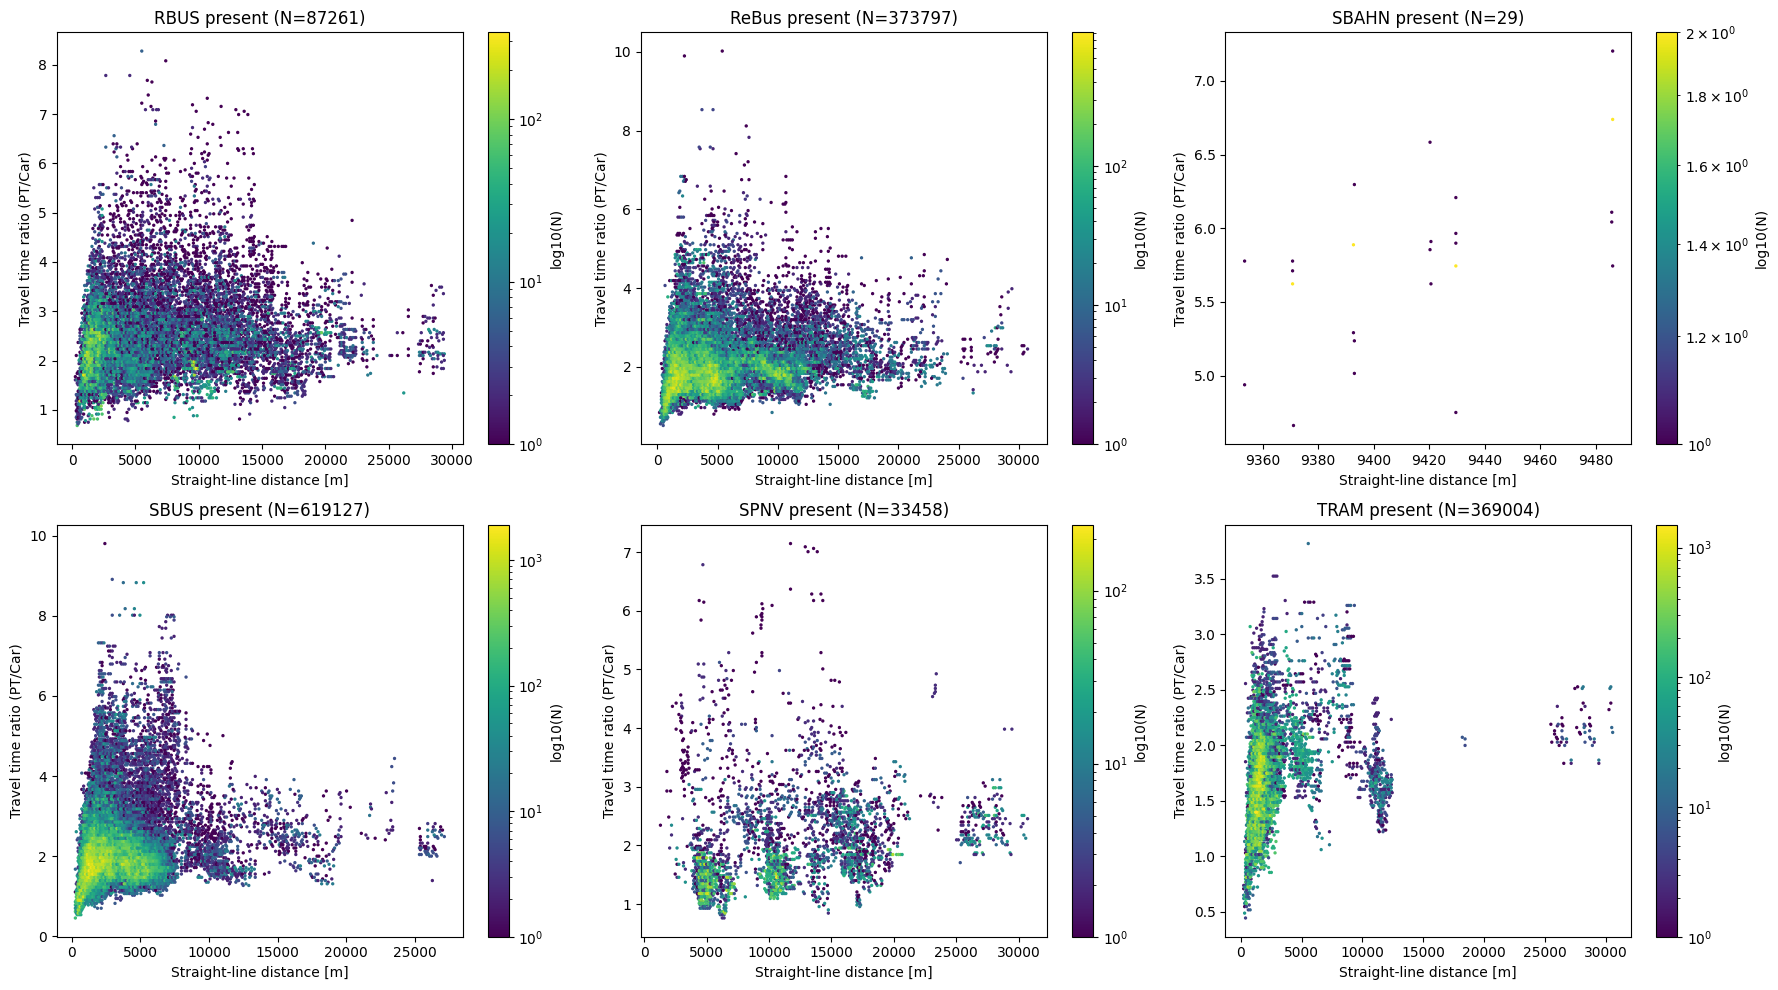

In [25]:
# Grid of hexbin plots: travel_time_ratio vs. straight_line_distance_m for each mode in used_routes_with_mode
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Collect all unique modes used
all_modes = set()
for entry in df_pt_filtered['used_routes_with_mode']:
    for mode_list in entry.values():
        for _, mode in mode_list:
            all_modes.add(mode)
all_modes = sorted([m for m in all_modes if m and m != 'unknown'])

# 2. For each mode, flag rows where that mode is present in used_routes_with_mode
def has_mode(row, mode):
    for mode_list in row['used_routes_with_mode'].values():
        if any(m == mode for _, m in mode_list):
            return True
    return False

# 3. Plot grid
n_cols = 3
n_rows = int(np.ceil(len(all_modes) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows), squeeze=False)

for idx, mode in enumerate(all_modes):
    ax = axes[idx // n_cols, idx % n_cols]
    mask = df_pt_filtered.apply(lambda row: has_mode(row, mode), axis=1)
    data = df_pt_filtered[mask]
    if len(data) > 0:
        hb = ax.hexbin(
            data["straight_line_distance_m"],
            data["travel_time_ratio"],
            gridsize=200, cmap="viridis", mincnt=1, bins="log"
        )
        fig.colorbar(hb, ax=ax, label="log10(N)")
    ax.set_title(f"{mode} present (N={len(data)})")
    ax.set_xlabel("Straight-line distance [m]")
    ax.set_ylabel("Travel time ratio (PT/Car)")

# Remove empty subplots
for idx in range(len(all_modes), n_rows*n_cols):
    fig.delaxes(axes[idx // n_cols, idx % n_cols])

plt.tight_layout()
plt.show()


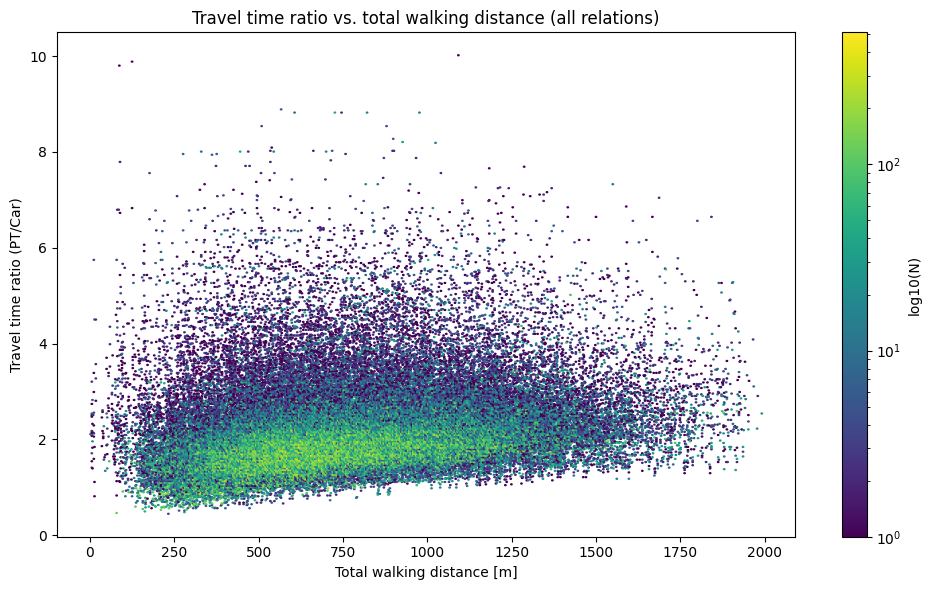

In [35]:
# Visualize travel_time_ratio vs. straight_line_distance_m for all relations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Use hexbin for large scatter (density visualization)
hb = plt.hexbin(
    df_pt_filtered["total_walking_distance"],
    df_pt_filtered["travel_time_ratio"],
    gridsize=500, cmap="viridis", mincnt=1, bins="log"
)
plt.colorbar(hb, label="log10(N)")
plt.xlabel("Total walking distance [m]")
plt.ylabel("Travel time ratio (PT/Car)")
plt.title("Travel time ratio vs. total walking distance (all relations)")
plt.tight_layout()
plt.show()


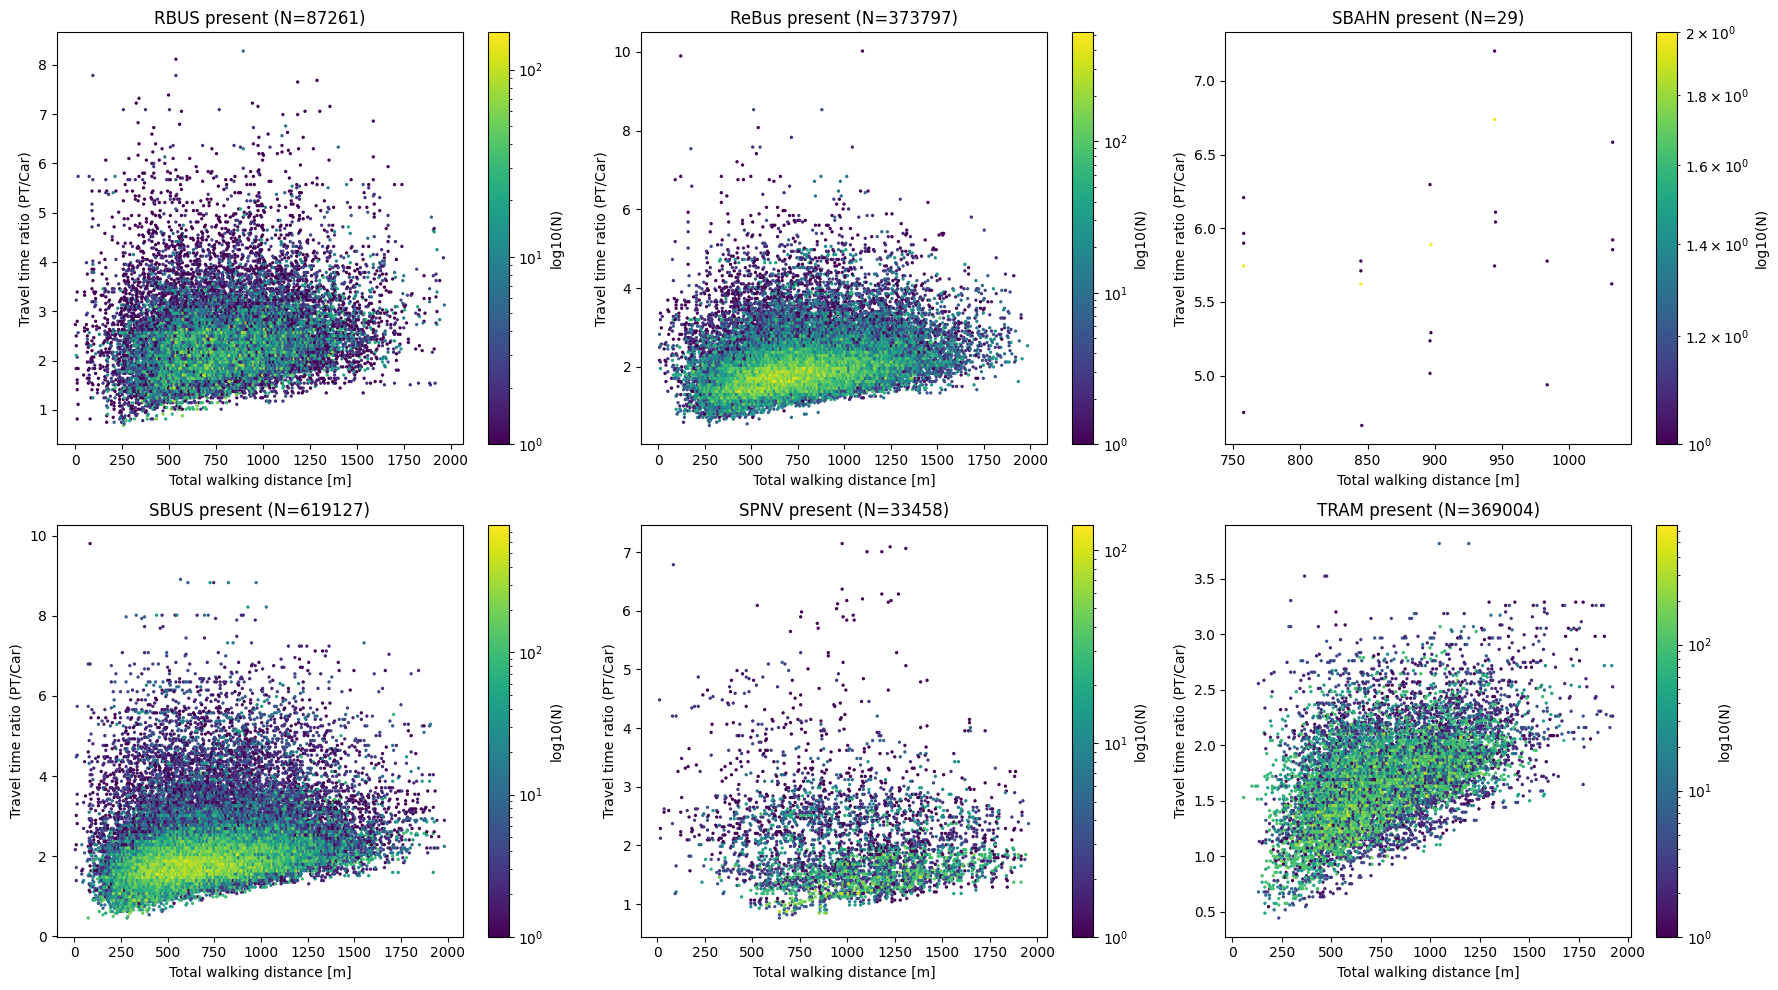

In [36]:
# Grid of hexbin plots: travel_time_ratio vs. straight_line_distance_m for each mode in used_routes_with_mode
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Collect all unique modes used
all_modes = set()
for entry in df_pt_filtered['used_routes_with_mode']:
    for mode_list in entry.values():
        for _, mode in mode_list:
            all_modes.add(mode)
all_modes = sorted([m for m in all_modes if m and m != 'unknown'])

# 2. For each mode, flag rows where that mode is present in used_routes_with_mode
def has_mode(row, mode):
    for mode_list in row['used_routes_with_mode'].values():
        if any(m == mode for _, m in mode_list):
            return True
    return False

# 3. Plot grid
n_cols = 3
n_rows = int(np.ceil(len(all_modes) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows), squeeze=False)

for idx, mode in enumerate(all_modes):
    ax = axes[idx // n_cols, idx % n_cols]
    mask = df_pt_filtered.apply(lambda row: has_mode(row, mode), axis=1)
    data = df_pt_filtered[mask]
    if len(data) > 0:
        hb = ax.hexbin(
            data["total_walking_distance"],
            data["travel_time_ratio"],
            gridsize=200, cmap="viridis", mincnt=1, bins="log"
        )
        fig.colorbar(hb, ax=ax, label="log10(N)")
    ax.set_title(f"{mode} present (N={len(data)})")
    ax.set_xlabel("Total walking distance [m]")
    ax.set_ylabel("Travel time ratio (PT/Car)")

# Remove empty subplots
for idx in range(len(all_modes), n_rows*n_cols):
    fig.delaxes(axes[idx // n_cols, idx % n_cols])

plt.tight_layout()
plt.show()


In [26]:
# 1. Create list of (line_id, travel_time_ratio, segment_type) from df_pt_filtered
records = []
for _, row in df_pt_filtered.iterrows():
    ratio = row["travel_time_ratio"]
    used = row["used_routes_with_mode"]
    for mode in ["Direct", "Transfer"]:
        for line_id, _ in used.get(mode, []):
            records.append((line_id, ratio, mode))

# 2. Convert to DataFrame
df_line_ratios = pd.DataFrame(records, columns=["line_id", "travel_time_ratio", "segment_type"])

# 3. Group by line and segment_type, calculate mean and count
pivot = (
    df_line_ratios
    .groupby(["line_id", "segment_type"])["travel_time_ratio"]
    .agg(["mean", "count"])
    .reset_index()
    .pivot(index="line_id", columns="segment_type", values="mean")
    .rename(columns={"Direct": "avg_travel_time_ratio_direct", "Transfer": "avg_travel_time_ratio_transfer"})
)

# 4. Merge with overall stats
line_avg_ratio = (
    df_line_ratios
    .groupby("line_id")["travel_time_ratio"]
    .agg(["mean", "count"])
    .reset_index()
    .rename(columns={"mean": "avg_travel_time_ratio", "count": "relation_count"})
    .set_index("line_id")
)

# 5. Combine all into one DataFrame
line_avg_ratio = line_avg_ratio.join(pivot)
line_avg_ratio = line_avg_ratio.reset_index()

# 6. Get list of ReBus line names from gdf_line_routes
rebus_lines = gdf_line_routes[gdf_line_routes.TSYSCODE == "ReBus"]["LINENAME"].unique()

# 7. Filter for ReBus lines only
line_avg_ratio_rebus = line_avg_ratio[line_avg_ratio["line_id"].isin(rebus_lines)]

line_avg_ratio_rebus

,line_id,avg_travel_time_ratio,relation_count,avg_travel_time_ratio_direct,avg_travel_time_ratio_transfer
11,13_650,2.341831,178,2.139082,3.527133
15,13_660,2.707285,589,2.696343,2.793996
16,13_810,2.435434,2547,2.278318,2.832575
19,13_830,2.448324,1178,2.455070,2.439758
24,13_840,2.370297,256,2.678693,2.332424
28,13_860,2.461736,1775,2.347997,2.811041
37,313_850,3.165344,354,3.769726,3.005615
52,34_420,1.864273,51733,1.864310,1.864036
58,34_430,1.994263,4341,2.148439,1.789385
64,34_450,1.686592,43323,1.674257,1.873666


In [27]:
# Optimized: Compute avg travel_time_ratio for core time (08:00-16:00) per ReBus line
core_start, core_end = 8, 16

def get_hour(row):
    val = row['time_slice']
    if hasattr(val, 'hour'):
        return val.hour
    try:
        return int(str(val)[:2])
    except Exception:
        return np.nan

rebus_lines_set = set(rebus_lines)

# 1. Add hour column if not present
if 'hour' not in df_pt_filtered.columns:
    df_pt_filtered['hour'] = df_pt_filtered.apply(get_hour, axis=1)

# 2. Explode to (row per line used)
def rebus_lines_in_row(row):
    found = set()
    for mode_list in row['used_routes_with_mode'].values():
        for line, _ in mode_list:
            if line in rebus_lines_set:
                found.add(line)
    return list(found)

df_exploded = df_pt_filtered.copy()
df_exploded['rebus_line'] = df_exploded.apply(rebus_lines_in_row, axis=1)
df_exploded = df_exploded.explode('rebus_line')
df_exploded = df_exploded[df_exploded['rebus_line'].notnull()]

# 3. Filter for core time
df_core = df_exploded[(df_exploded['hour'] >= core_start) & (df_exploded['hour'] < core_end)]

# 4. Group and aggregate
core_means = df_core.groupby('rebus_line')['travel_time_ratio'].mean()

# 5. Map to summary DataFrame
line_avg_ratio_rebus = line_avg_ratio_rebus.copy()
line_avg_ratio_rebus['avg_travel_time_ratio_core_8_16'] = line_avg_ratio_rebus['line_id'].map(core_means)
line_avg_ratio_rebus

,line_id,avg_travel_time_ratio,relation_count,avg_travel_time_ratio_direct,avg_travel_time_ratio_transfer,avg_travel_time_ratio_core_8_16
11,13_650,2.341831,178,2.139082,3.527133,2.423716
15,13_660,2.707285,589,2.696343,2.793996,2.639958
16,13_810,2.435434,2547,2.278318,2.832575,2.348755
19,13_830,2.448324,1178,2.455070,2.439758,2.389053
24,13_840,2.370297,256,2.678693,2.332424,2.362093
28,13_860,2.461736,1775,2.347997,2.811041,2.442399
37,313_850,3.165344,354,3.769726,3.005615,3.064163
52,34_420,1.864273,51733,1.864310,1.864036,1.908224
58,34_430,1.994263,4341,2.148439,1.789385,1.931866
64,34_450,1.686592,43323,1.674257,1.873666,1.701895


In [28]:
# --- Also compute for Direct and Transfer segments in core time ---
# 1. Explode by segment_type as well (Direct/Transfer)
def rebus_lines_and_types_in_row(row):
    result = []
    for seg_type in ['Direct', 'Transfer']:
        for line, _ in row['used_routes_with_mode'].get(seg_type, []):
            if line in rebus_lines_set:
                result.append((line, seg_type))
    return result

df_exploded_types = df_pt_filtered.copy()
df_exploded_types['rebus_line_and_type'] = df_exploded_types.apply(rebus_lines_and_types_in_row, axis=1)
df_exploded_types = df_exploded_types.explode('rebus_line_and_type')
df_exploded_types = df_exploded_types[df_exploded_types['rebus_line_and_type'].notnull()]

# Add columns for line and segment_type
df_exploded_types['rebus_line'] = df_exploded_types['rebus_line_and_type'].apply(lambda x: x[0])
df_exploded_types['segment_type'] = df_exploded_types['rebus_line_and_type'].apply(lambda x: x[1])

# Filter for core time
df_core_types = df_exploded_types[(df_exploded_types['hour'] >= core_start) & (df_exploded_types['hour'] < core_end)]

# Group and aggregate for Direct and Transfer
core_means_types = df_core_types.groupby(['rebus_line', 'segment_type'])['travel_time_ratio'].mean().unstack()

# Map to summary DataFrame
line_avg_ratio_rebus = line_avg_ratio_rebus.copy()
line_avg_ratio_rebus['avg_travel_time_ratio_core_8_16_direct'] = line_avg_ratio_rebus['line_id'].map(core_means_types.get('Direct') if 'Direct' in core_means_types else {})
line_avg_ratio_rebus['avg_travel_time_ratio_core_8_16_transfer'] = line_avg_ratio_rebus['line_id'].map(core_means_types.get('Transfer') if 'Transfer' in core_means_types else {})
line_avg_ratio_rebus

,line_id,avg_travel_time_ratio,relation_count,avg_travel_time_ratio_direct,avg_travel_time_ratio_transfer,avg_travel_time_ratio_core_8_16,avg_travel_time_ratio_core_8_16_direct,avg_travel_time_ratio_core_8_16_transfer
11,13_650,2.341831,178,2.139082,3.527133,2.423716,2.170929,4.066831
15,13_660,2.707285,589,2.696343,2.793996,2.639958,2.602249,2.879732
16,13_810,2.435434,2547,2.278318,2.832575,2.348755,2.217941,2.687596
19,13_830,2.448324,1178,2.455070,2.439758,2.389053,2.371204,2.440364
24,13_840,2.370297,256,2.678693,2.332424,2.362093,2.575025,2.330252
28,13_860,2.461736,1775,2.347997,2.811041,2.442399,2.306407,2.866930
37,313_850,3.165344,354,3.769726,3.005615,3.064163,3.512740,2.941270
52,34_420,1.864273,51733,1.864310,1.864036,1.908224,1.904645,1.935817
58,34_430,1.994263,4341,2.148439,1.789385,1.931866,2.091653,1.767013
64,34_450,1.686592,43323,1.674257,1.873666,1.701895,1.684998,1.946747


In [29]:
line_avg_ratio_rebus.sort_values("avg_travel_time_ratio_direct")

,line_id,avg_travel_time_ratio,relation_count,avg_travel_time_ratio_direct,avg_travel_time_ratio_transfer,avg_travel_time_ratio_core_8_16,avg_travel_time_ratio_core_8_16_direct,avg_travel_time_ratio_core_8_16_transfer
216,55_230,2.311033,5812,1.397309,2.444964,2.385252,1.326800,2.456052
67,34_480,1.624925,19086,1.635230,1.522129,1.611280,1.618855,1.559046
64,34_450,1.686592,43323,1.674257,1.873666,1.701895,1.684998,1.946747
104,51_620,1.839428,36534,1.835086,1.986884,1.846537,1.842581,1.978984
70,34_560,1.860855,74079,1.859278,1.922457,1.868903,1.867081,1.921780
52,34_420,1.864273,51733,1.864310,1.864036,1.908224,1.904645,1.935817
227,56_730,1.901478,9470,1.929629,1.812395,1.871411,1.879201,1.843311
110,51_640,1.969458,1380,1.950642,2.714352,1.956777,1.921140,2.744134
257,85_160,1.994899,22882,1.961140,2.283672,1.961524,1.950841,2.044310
98,51_610,1.997291,5106,1.975482,2.708092,1.953521,1.947800,3.022215


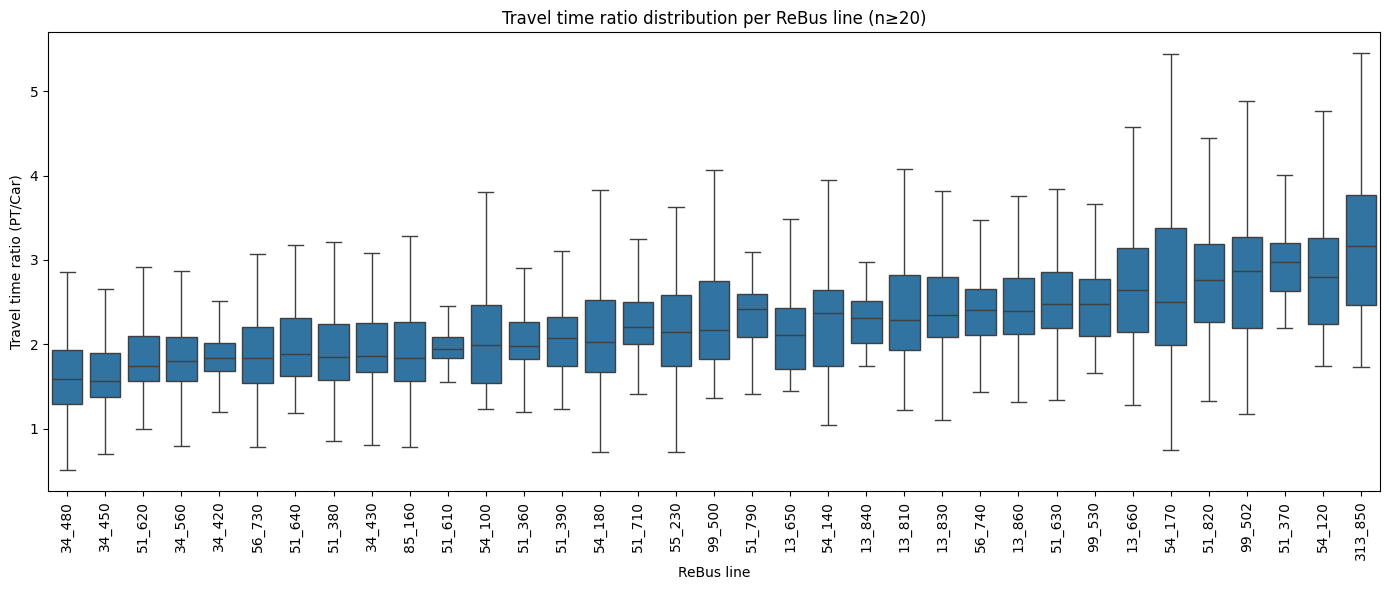

In [30]:
# Boxplot: Travel time ratio distribution per ReBus line (only lines with >=20 relations)
import matplotlib.pyplot as plt
import seaborn as sns

min_relations = 20
rebus_lines_set = set(rebus_lines)
df_rebus = df_line_ratios[df_line_ratios["line_id"].isin(rebus_lines_set)]
line_counts = df_rebus["line_id"].value_counts()
lines_to_plot = line_counts[line_counts >= min_relations].index
df_rebus_plot = df_rebus[df_rebus["line_id"].isin(lines_to_plot)]

plt.figure(figsize=(14, 6))
order = df_rebus_plot.groupby("line_id")["travel_time_ratio"].mean().sort_values().index
sns.boxplot(
    data=df_rebus_plot,
    x="line_id",
    y="travel_time_ratio",
    order=order,
    showfliers=False
)
plt.xticks(rotation=90)
plt.xlabel("ReBus line")
plt.ylabel("Travel time ratio (PT/Car)")
plt.title(f"Travel time ratio distribution per ReBus line (n≥{min_relations})")
plt.tight_layout()
plt.show()


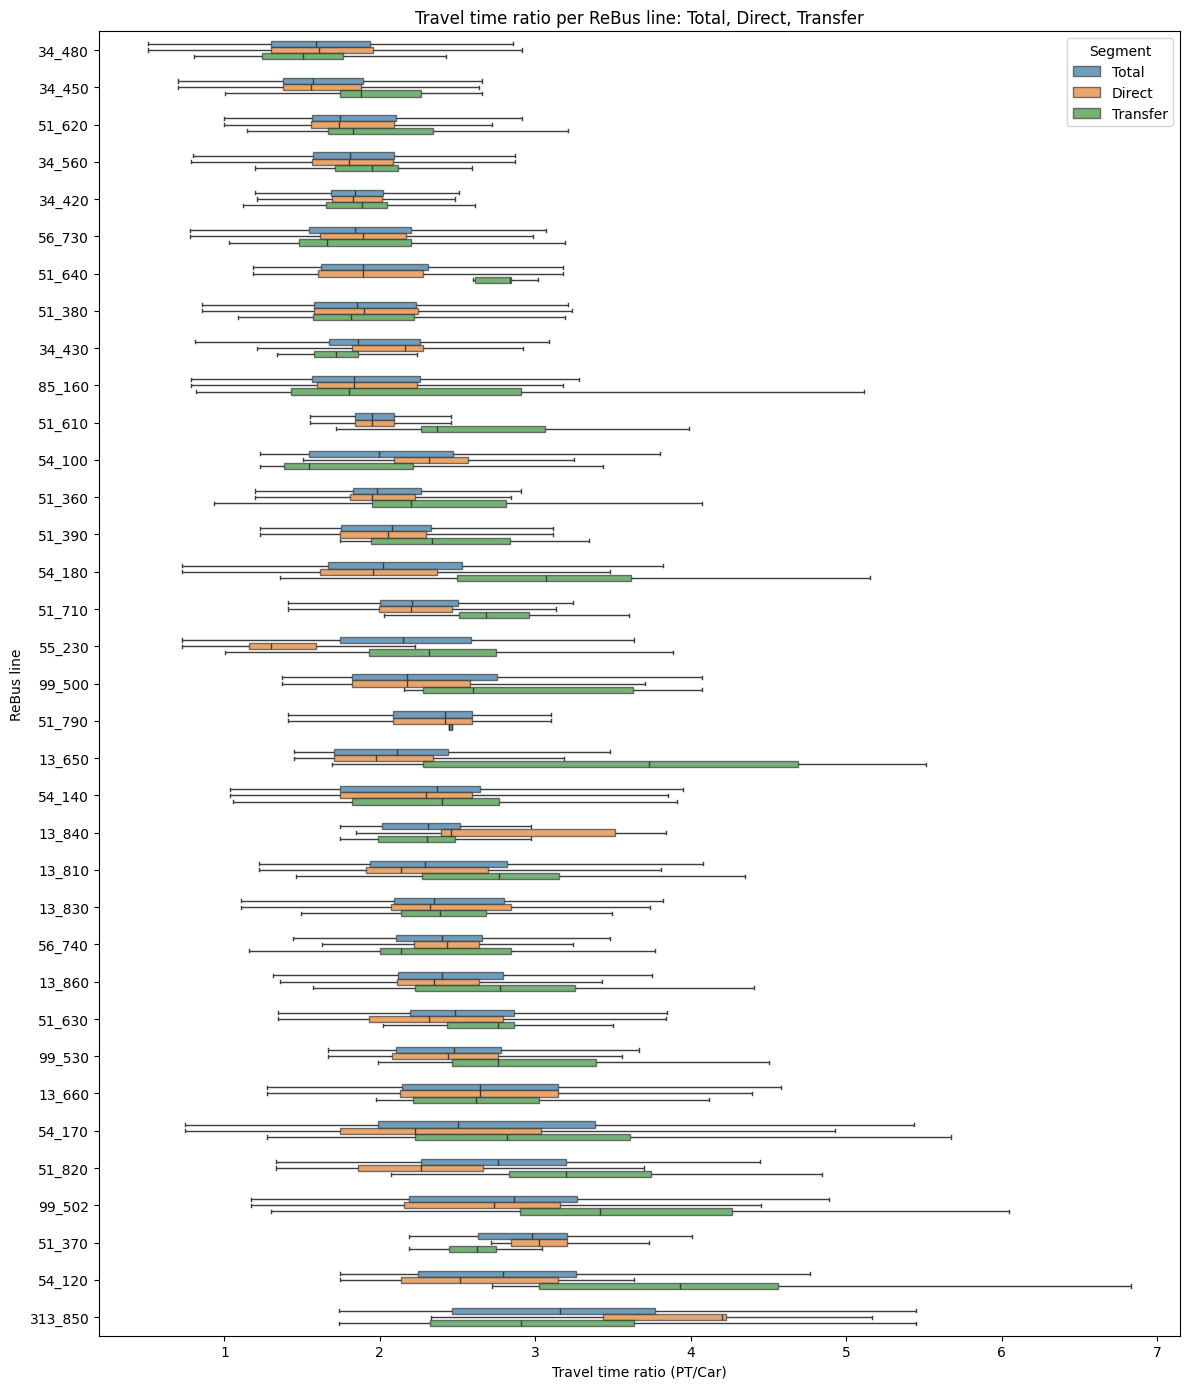

In [31]:
# Single boxplot: line_id on y-axis, three boxplots (Total, Direct, Transfer) per line
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

min_relations = 20
rebus_lines_set = set(rebus_lines)
df_rebus = df_line_ratios[df_line_ratios["line_id"].isin(rebus_lines_set)]
line_counts = df_rebus["line_id"].value_counts()
lines_to_plot = line_counts[line_counts >= min_relations].index

# Prepare data for all three types
plot_data = []
for seg, label in [(None, "Total"), ("Direct", "Direct"), ("Transfer", "Transfer")]:
    if seg is None:
        data = df_rebus[df_rebus["line_id"].isin(lines_to_plot)].copy()
    else:
        data = df_rebus[(df_rebus["segment_type"] == seg) & (df_rebus["line_id"].isin(lines_to_plot))].copy()
    data["Type"] = label
    plot_data.append(data)
plot_df = pd.concat(plot_data, ignore_index=True)

# Sort lines by total mean
order = (
    plot_df[plot_df["Type"] == "Total"]
    .groupby("line_id")["travel_time_ratio"]
    .mean()
    .sort_values()
    .index
)

plt.figure(figsize=(12, max(6, len(order)*0.4)))
sns.boxplot(
    data=plot_df,
    y="line_id",
    x="travel_time_ratio",
    hue="Type",
    order=order,
    showfliers=False,
    orient="h",
    width=0.5,
    boxprops=dict(alpha=0.7)
)
plt.xlabel("Travel time ratio (PT/Car)")
plt.ylabel("ReBus line")
plt.title("Travel time ratio per ReBus line: Total, Direct, Transfer")
plt.legend(title="Segment", loc="best")
plt.tight_layout()
plt.show()


C:\Users\bienzeisler\AppData\Local\Temp\ipykernel_2100\2324880073.py:47: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



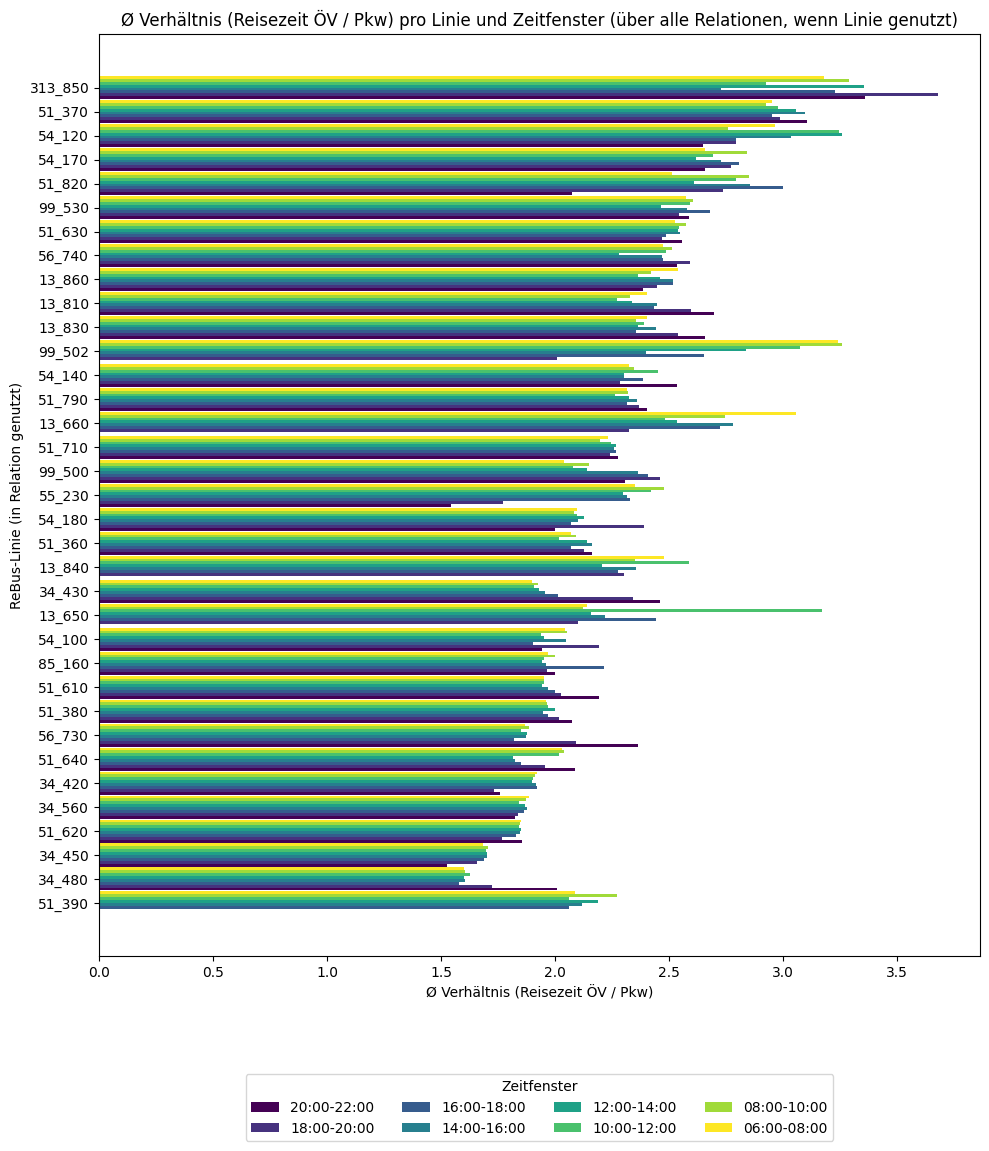

In [45]:
# For all relations: for each ReBus line, flag if the line is used (in any used_routes_with_mode), then plot avg travel_time_ratio per line and time slot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define time slots (2-hour intervals up to 22:00)
time_bins = [6, 8, 10, 12, 14, 16, 18, 20, 22]
time_labels = [f"{str(h).zfill(2)}:00-{str(h+2).zfill(2)}:00" for h in time_bins[:-1]]

rebus_lines_set = set(rebus_lines)

# Helper: get hour from time_slice
def get_hour(row):
    val = row['time_slice']
    if hasattr(val, 'hour'):
        return val.hour
    try:
        return int(str(val)[:2])
    except Exception:
        return np.nan

df = df_pt_filtered.copy()
df['hour'] = df.apply(get_hour, axis=1)
df['time_slot'] = pd.cut(df['hour'], bins=time_bins, right=False, labels=time_labels)

# For each relation, for each ReBus line, flag if the line is used in used_routes_with_mode
def rebus_lines_in_row(row):
    found = set()
    for mode_list in row['used_routes_with_mode'].values():
        for line, _ in mode_list:
            if line in rebus_lines_set:
                found.add(line)
    return list(found)

df['rebus_lines_used'] = df.apply(rebus_lines_in_row, axis=1)

# Explode so each row is (relation, rebus_line_used)
df_exploded = df.explode('rebus_lines_used')
df_exploded = df_exploded[df_exploded['rebus_lines_used'].notnull()]

# Only keep lines with at least 5 relations overall
line_counts = df_exploded['rebus_lines_used'].value_counts()
lines_to_plot = line_counts[line_counts >= 5].index
plot_df = df_exploded[df_exploded['rebus_lines_used'].isin(lines_to_plot)]

# Group and pivot
grouped = plot_df.groupby(['rebus_lines_used', 'time_slot'])["travel_time_ratio"].mean().unstack().fillna(0)
order = grouped.mean(axis=1).sort_values().index

# Plot (reverse time_labels and colors for stacking order)
fig, ax = plt.subplots(figsize=(10, max(6, len(order)*0.35)))
bar_width = 0.12
n_slots = len(time_labels)
y = np.arange(len(order))
colors = plt.cm.viridis(np.linspace(0, 1, n_slots)) # reverse color order
reversed_time_labels = time_labels[::-1]

for i, slot in enumerate(reversed_time_labels):
    ax.barh(y + (i - n_slots/2)*bar_width + bar_width/2, grouped.loc[order, slot], height=bar_width, label=slot, color=colors[i])

ax.set_yticks(y)
ax.set_yticklabels(order)
ax.set_xlabel("Ø Verhältnis (Reisezeit ÖV / Pkw)")
ax.set_ylabel("ReBus-Linie (in Relation genutzt)")
ax.set_title("Ø Verhältnis (Reisezeit ÖV / Pkw) pro Linie und Zeitfenster (über alle Relationen, wenn Linie genutzt)")
ax.legend(title="Zeitfenster", bbox_to_anchor=(0.5, -0.12), loc='upper center', ncol=4)
plt.tight_layout(rect=[0,0.05,1,1])
plt.show()

C:\Users\bienzeisler\AppData\Local\Temp\ipykernel_2100\1781947669.py:42: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



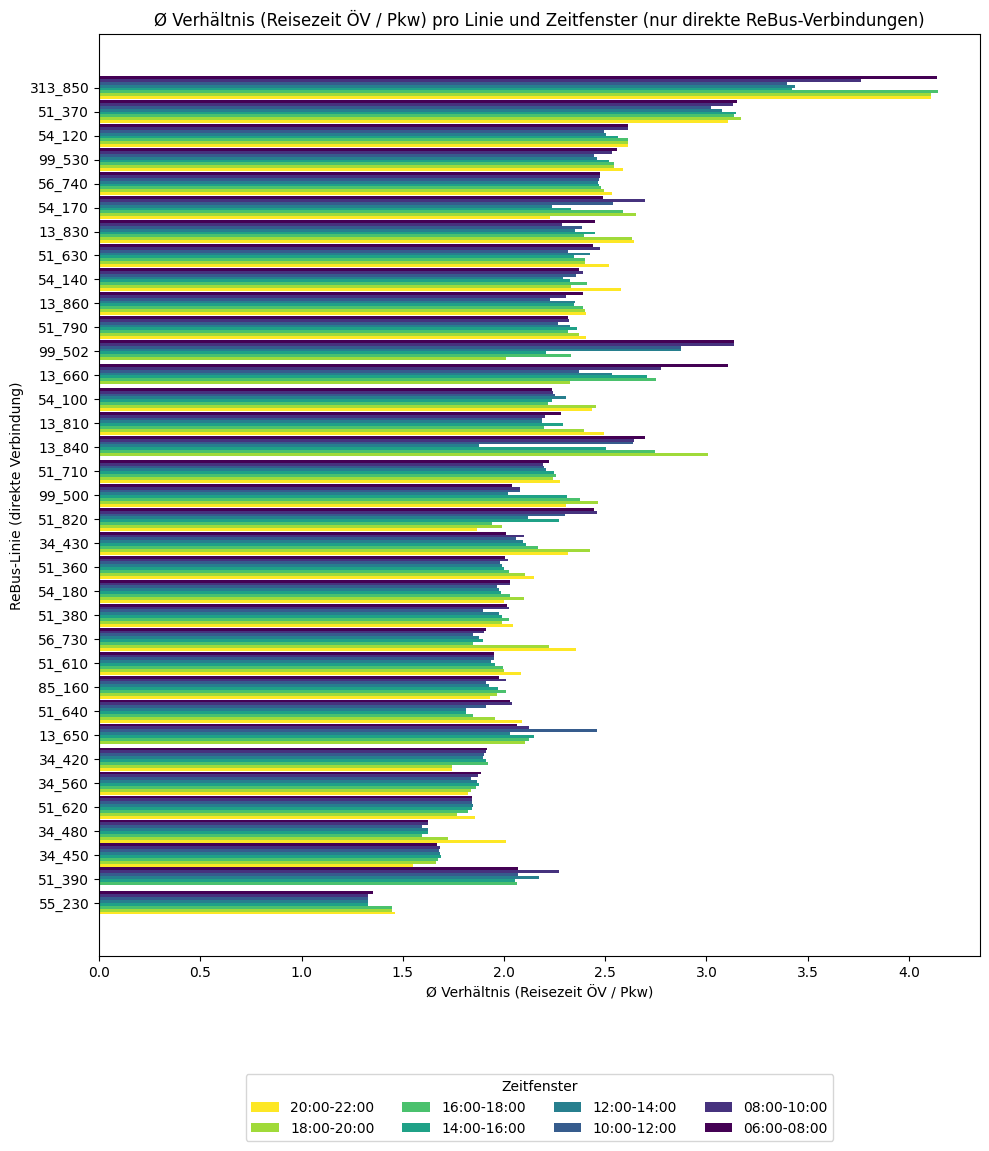

In [34]:
# Für alle Relationen: Für jede ReBus-Linie, wenn sie als direkte Verbindung genutzt wird, Ø travel_time_ratio pro Linie und Zeitfenster (wie oben, aber nur Direct)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Wir nutzen df_line_ratios und df_pt_filtered, filtern aber auf Direct-Segmente
rebus_lines_set = set(rebus_lines)

# Helper: get hour from time_slice
def get_hour(row):
    val = row['time_slice']
    if hasattr(val, 'hour'):
        return val.hour
    try:
        return int(str(val)[:2])
    except Exception:
        return np.nan

# Explode df_pt_filtered auf alle Direct-ReBus-Linien pro Relation
def direct_rebus_lines_in_row(row):
    found = set()
    for line, _ in row['used_routes_with_mode'].get('Direct', []):
        if line in rebus_lines_set:
            found.add(line)
    return list(found)

df_direct = df_pt_filtered.copy()
df_direct['hour'] = df_direct.apply(get_hour, axis=1)
df_direct['time_slot'] = pd.cut(df_direct['hour'], bins=time_bins, right=False, labels=time_labels)
df_direct['direct_rebus_lines_used'] = df_direct.apply(direct_rebus_lines_in_row, axis=1)

# Explode so each row is (relation, direct_rebus_line_used)
df_exploded = df_direct.explode('direct_rebus_lines_used')
df_exploded = df_exploded[df_exploded['direct_rebus_lines_used'].notnull()]

# Only keep lines with at least 5 relations overall
line_counts = df_exploded['direct_rebus_lines_used'].value_counts()
lines_to_plot = line_counts[line_counts >= 5].index
plot_df = df_exploded[df_exploded['direct_rebus_lines_used'].isin(lines_to_plot)]

# Group and pivot
grouped = plot_df.groupby(['direct_rebus_lines_used', 'time_slot'])["travel_time_ratio"].mean().unstack().fillna(0)
order = grouped.mean(axis=1).sort_values().index

# Plot (reverse time_labels and colors for stacking order)
fig, ax = plt.subplots(figsize=(10, max(6, len(order)*0.35)))
bar_width = 0.12
n_slots = len(time_labels)
y = np.arange(len(order))
colors = plt.cm.viridis(np.linspace(0, 1, n_slots))[::-1]  # reverse color order
reversed_time_labels = time_labels[::-1]

for i, slot in enumerate(reversed_time_labels):
    ax.barh(y + (i - n_slots/2)*bar_width + bar_width/2, grouped.loc[order, slot], height=bar_width, label=slot, color=colors[i])

ax.set_yticks(y)
ax.set_yticklabels(order)
ax.set_xlabel("Ø Verhältnis (Reisezeit ÖV / Pkw)")
ax.set_ylabel("ReBus-Linie (direkte Verbindung)")
ax.set_title("Ø Verhältnis (Reisezeit ÖV / Pkw) pro Linie und Zeitfenster (nur direkte ReBus-Verbindungen)")
ax.legend(title="Zeitfenster", bbox_to_anchor=(0.5, -0.12), loc='upper center', ncol=4)
plt.tight_layout(rect=[0,0.05,1,1])
plt.show()